# Search Space

Tune defines its own searching space concept and different expressions. It inherits the Fugue philosophy: one expression for all frameworks. For the underlying optimizers (e.g. HyperOpt, Optuna), tune unifies the behaviors. For example `Rand(1.0, 5.0, q=1.5)` will uniformly search on `[1.0 , 2.5, 4.0]` no matter you use HyperOpt or Optuna as the underlying optimizer.

In Tune, spaces are predefined before search, it is opposite to Optuna where you get variables inside objectives during runtime. In this way, your space definition is totally separated from objective definition, and your objectives may be just simple python functions independent from Tune.

In [2]:
from tune import Space, Grid, Rand, RandInt, Choice
import pandas as pd

## Simple Cases

The simplest cases are spaces with only static variables. So the spaces will always generate single configuration.

In [5]:
space = Space(a=1, b=1)
print(list(space))

[{'a': 1, 'b': 1}]


## Grid Search

You can replace the static variables to `Grid` expression. We will cross product all grid expressions in the space, so you see in the second example, it generates 6 configurations.

In [4]:
print(list(Space(a=1, b=Grid("a","b"))))
print(list(Space(a=Grid(1,2), b=Grid("x","y","z"))))

[{'a': 1, 'b': 'a'}, {'a': 1, 'b': 'b'}]
[{'a': 1, 'b': 'x'}, {'a': 1, 'b': 'y'}, {'a': 1, 'b': 'z'}, {'a': 2, 'b': 'x'}, {'a': 2, 'b': 'y'}, {'a': 2, 'b': 'z'}]


## Random Expressions

Random search requires `.sample` method after you define the original space to specify how many random combinations you want to draw from the expression.

### Choice

`Choice` refers to discrete **unordered** set of values. So `Choice(1, 2, 3)` is equivalent to `Choide(2, 1, 3)`. When you do random sampling from `Choice`, every value has equal chance. When you do advanced search such as Bayesian Optimization, it also assumes no relation between values.

In [8]:
space = Space(a=1, b=Choice("aa", "bb", "cc")).sample(2, seed=1)
print(list(space))

[{'a': 1, 'b': 'bb'}, {'a': 1, 'b': 'aa'}]


### Rand

`Rand` is the most common expression for a variable. It refers to sampling from a range of value.

**Rand(low, high)**: uniformly search between `[low, high)`

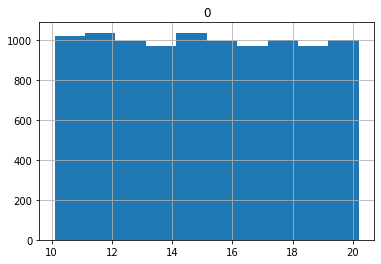

In [5]:
samples = Rand(10.1, 20.2).generate_many(10000, seed=0)
pd.DataFrame(samples).hist();

**Rand(low, high, log=True)**: search in the log space, but still in `[low, high)` so the smaller values get higher chance to be selected.

For log space searching, low must be greater or equal to 1

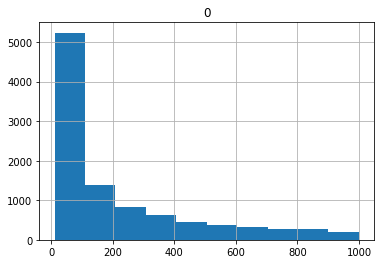

In [6]:
samples = Rand(10.1, 1000, log=True).generate_many(10000, seed=0)
pd.DataFrame(samples).hist();

**Rand(low, high, q, include_high)**: uniformly search between `low` and `high` with step `q`. `include_high` (default `True`) indicates whether the high value can be a candidate.

[1.5, 4.0, 1.5, 1.5, 1.5, 1.5, 1.5, 4.0, 4.0, 1.5]
[1.5, 1.5, 1.5, 1.5, -1.0, 1.5, -1.0, 1.5, 1.5, -1.0]


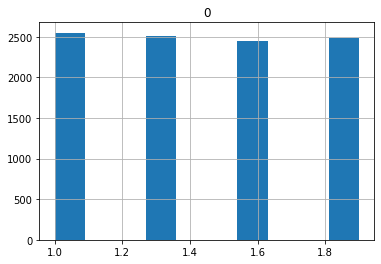

In [12]:
print(Rand(-1.0,4.0,q=2.5).generate_many(10, seed=0))
print(Rand(-1.0,4.0,q=2.5,include_high=False).generate_many(10, seed=0))

samples = Rand(1.0,2.0,q=0.3).generate_many(10000, seed=0)
pd.DataFrame(samples).hist();

**Rand(low, high, q, include_high, log=True)**: search between `low` and `high` with step `q` in log space. `include_high` (default `True`) indicates whether the high value can be a candidate.

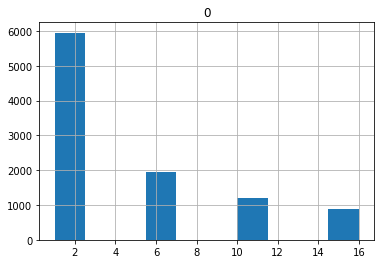

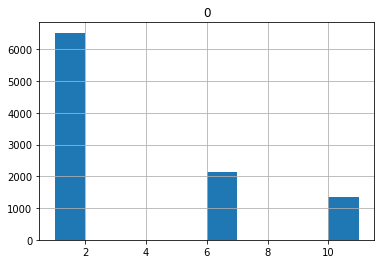

In [3]:
samples = Rand(1.0,16.0,q=5, log=True).generate_many(10000, seed=0)
pd.DataFrame(samples).hist()

samples = Rand(1.0,16.0,q=5, log=True, include_high=False).generate_many(10000, seed=0)
pd.DataFrame(samples).hist();